In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import rainbow
%matplotlib inline

In [3]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

**IMPORTING THE DATASET**


In [4]:
df=pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

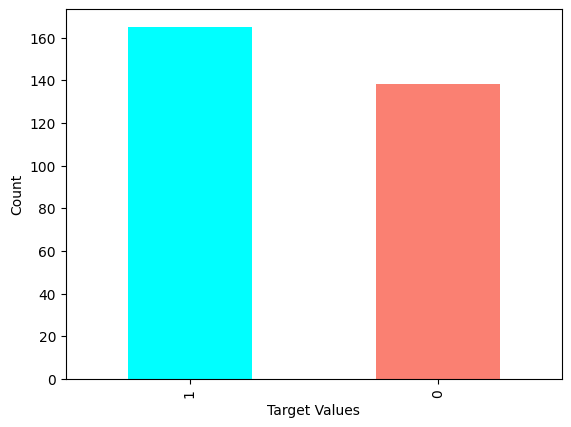

1    165
0    138
Name: target, dtype: int64

In [7]:
df["target"].value_counts().plot(kind="bar",color=["aqua","salmon"]);
plt.xlabel("Target Values")
plt.ylabel("Count")
plt.show()
df["target"].value_counts()

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


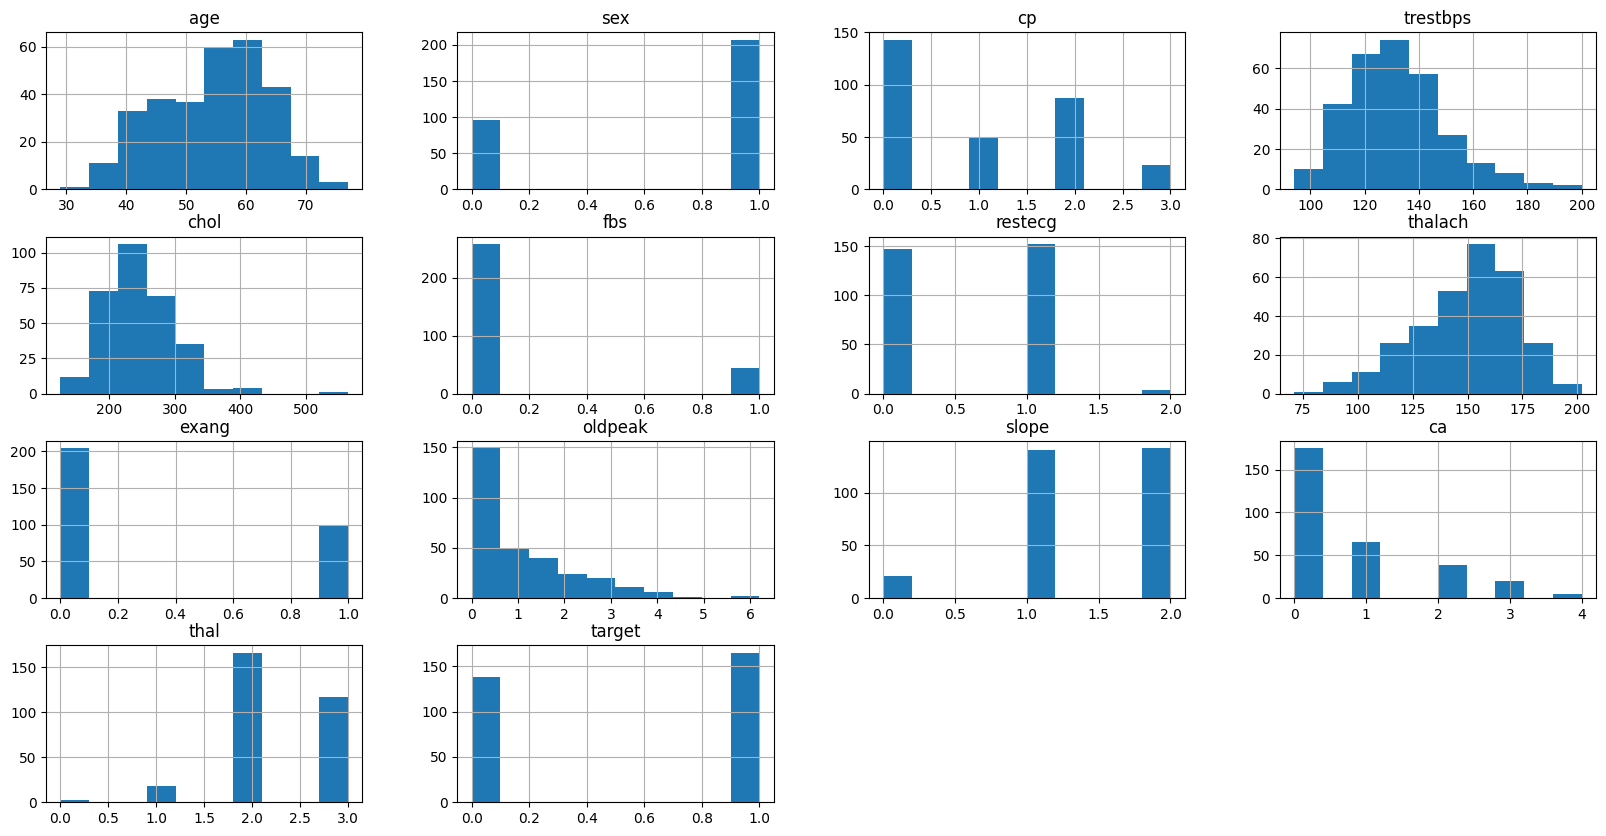

In [9]:
df.hist(figsize=(20,10));

In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


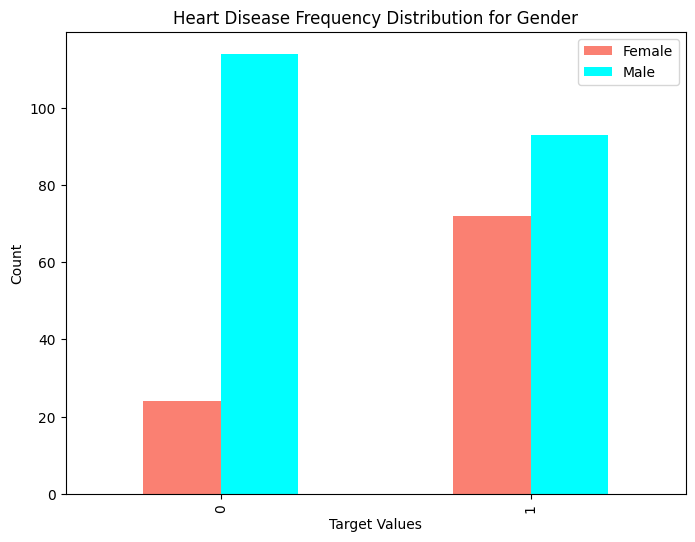

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(8,6),color=("salmon","aqua"));
plt.title("Heart Disease Frequency Distribution for Gender")
plt.xlabel("Target Values")
plt.ylabel("Count")
plt.legend(["Female","Male"]);

In [13]:
df["thalach"].value_counts() #thalach --> maximum heart rate

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [14]:
pd.crosstab(df.thalach,df.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
thalach,,,,,,,,,,,,,,,,,,,,,
71,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


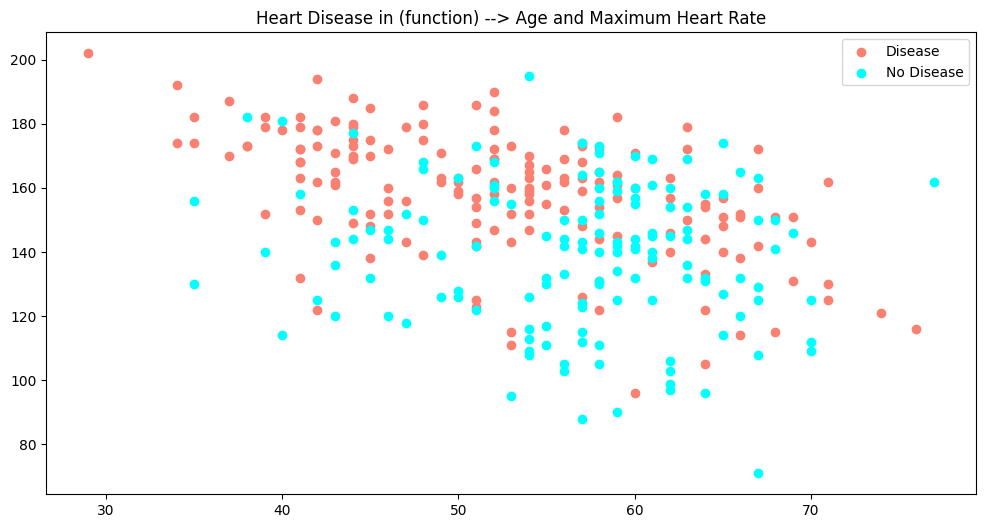

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="aqua")
plt.title("Heart Disease in (function) --> Age and Maximum Heart Rate")
plt.legend(["Disease","No Disease"]);

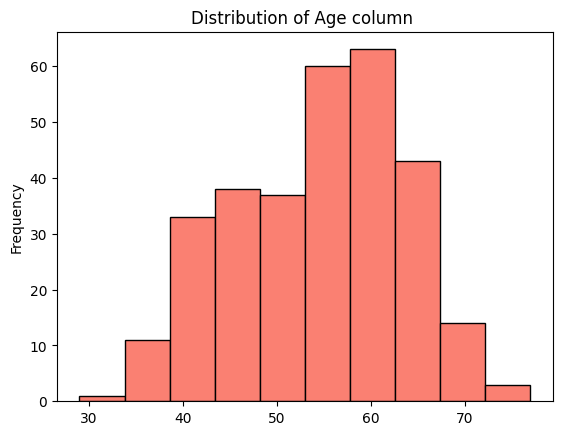

In [16]:
df.age.plot.hist(color="salmon", edgecolor="black");
plt.title("Distribution of Age column ");

## **HEART DISEASE FREQUENCY PER CHEST PAIN**

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


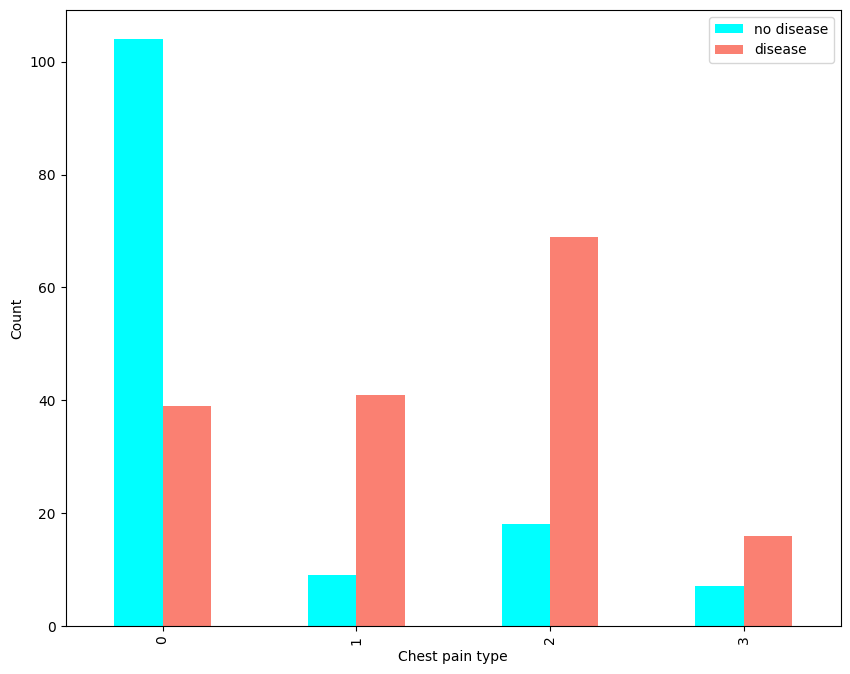

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,8),color=["aqua","salmon"])
plt.xlabel("Chest pain type")
plt.ylabel("Count")
plt.legend(["no disease","disease"]);

In [19]:
#correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


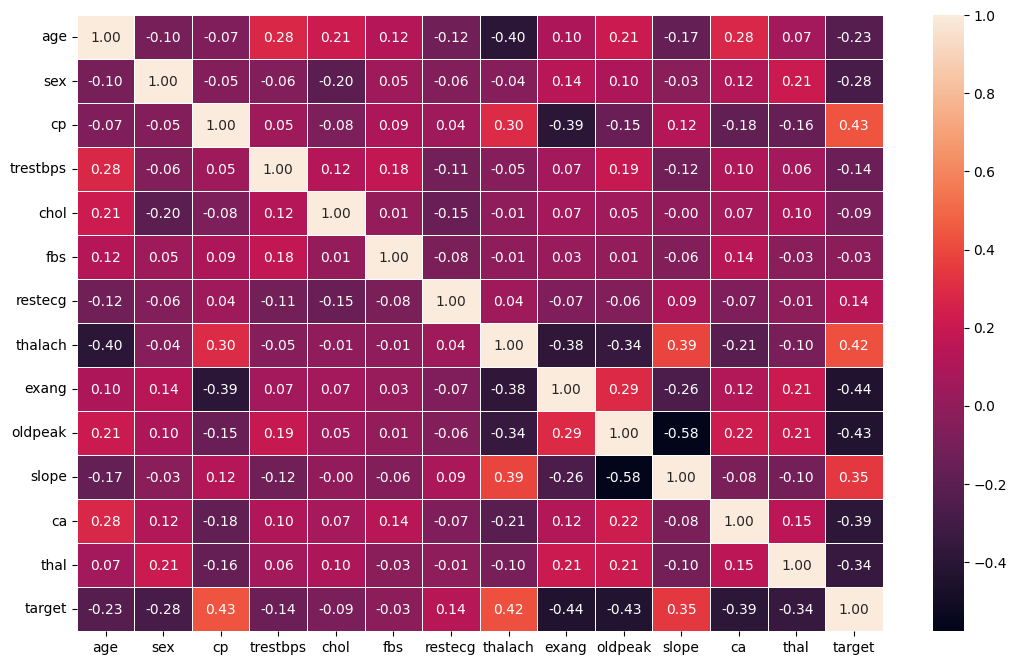

In [20]:
#heatmap of the correlation matrix using the Seaborn library
corr_matrix = df.corr()
fig,ax= plt.subplots(figsize=(13,8)) #fig --> figure object, ax --> axis object
ax=sns.heatmap(corr_matrix,annot=True,linewidth=0.5,fmt=".2f"); #annot --> correlation values in each cell of the heatmap

# **MODELLING**

In [21]:
x=df.drop("target",axis=1) #all the columns except target
y=df["target"] #only the target column
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [22]:
np.random.seed(42)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #spliting the data into two subset (training & testing) in 80:20

In [24]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [25]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

# **KNN**

In [26]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

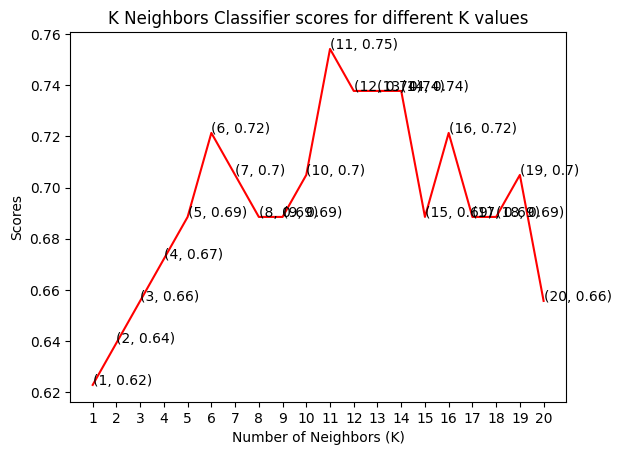

In [27]:
plt.plot([k for k in range(1, 21)],knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 2)))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [28]:
knn_classifier = KNeighborsClassifier(n_neighbors = 11)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

Accuracy: 75.40983606557377

Hence, the score for K Neighbors Classifier is 75.40983606557377% with 11 nieghbors.



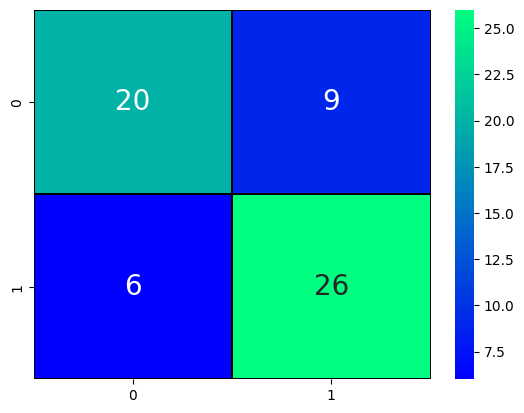

In [29]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, y_pred))
print("Accuracy:", knn_scores[10]*100)
print("\nHence, the score for K Neighbors Classifier is {}% with {} nieghbors.\n".format(knn_scores[10]*100, 11))

In [30]:
train_scores=[]
test_scores=[]
#create a list of different values for n_neighbors
neighbors = range(1,11)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853]

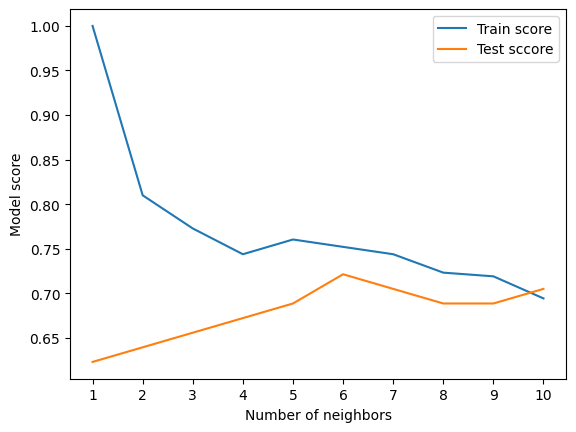

In [32]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test sccore")
plt.xticks(np.arange(1,11,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

The K-Nearest Neighbors classifier achieved a perfect accuracy score of 1.0 on the training set when nearest neighbors = 1. As the value of nearest neighbors increased, the accuracy score on the training set generally decreased, indicating that the model was becoming less overfit to the training data.

# **RANDOM FOREST CLASSIFIER**



In [33]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_scores.append(rf_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

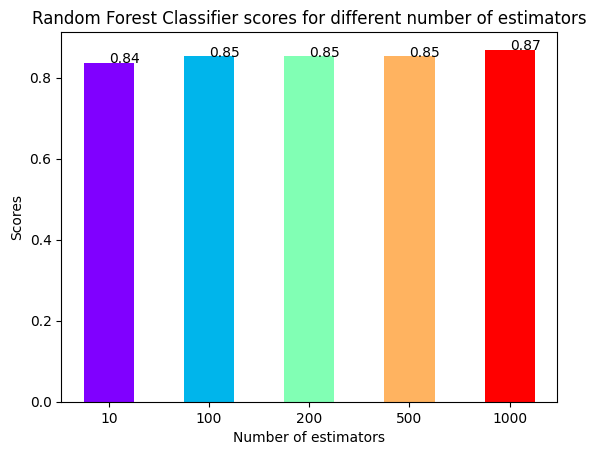

In [34]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color=colors, width=0.5)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], '{:.2f}'.format(rf_scores[i]))
plt.xticks(ticks=[i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')


              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

Accuracy: 85.24590163934425

Hence, the score for Random Forest Classifier is 85.24590163934425% with [100, 500] estimators.



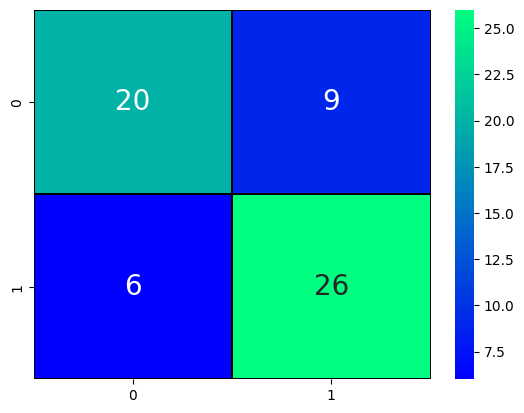

In [35]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, y_pred))
print("Accuracy:", rf_scores[3]*100)
print("\nHence, the score for Random Forest Classifier is {}% with {} estimators.\n".format(rf_scores[3]*100, [100, 500]))

# **LOGISTIC REGRESSION**

In [36]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf = LogisticRegression(max_iter=1000, solver='lbfgs')

grid_values = {'penalty': ['l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,15,100]}

grid_clf_acc = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy')

grid_clf_acc.fit(x_train_scaled, y_train)

y_pred = grid_clf_acc.predict(x_test_scaled)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 85.24590163934425

Hence, the score for logistic regression is  85.24590163934425 



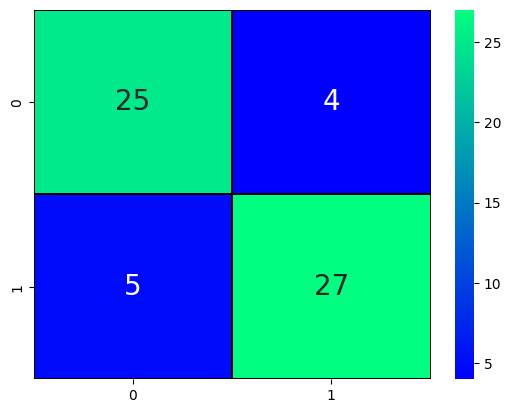

In [37]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, y_pred))
print("Accuracy:", (accuracy*100))
print("\nHence, the score for logistic regression is ", (accuracy*100),"\n")

#**DECISION TREE**

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61

Accuracy: 85.24590163934425

Hence, the score for Desicion Tree is  85.24590163934425 



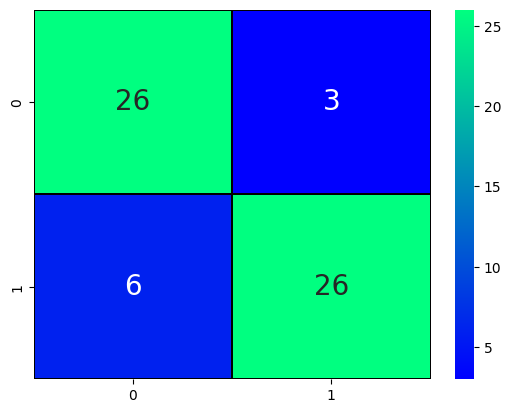

In [38]:
# Create a Decision Tree Classifier with max depth of 3
clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)


cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, y_pred))
print("Accuracy:", (accuracy*100))
print("\nHence, the score for Desicion Tree is ", (accuracy*100),"\n")

#**AdaBOOST**

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 85.24590163934425

Hence, the score for AdaBoost is  85.24590163934425 



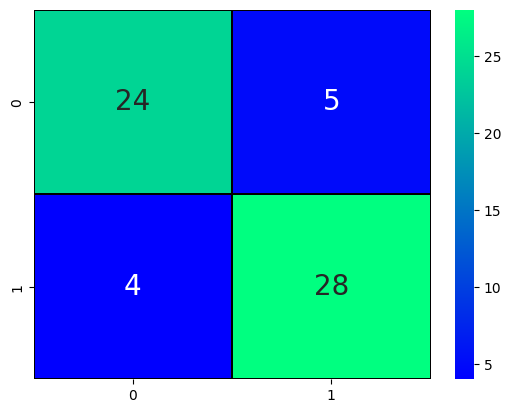

In [39]:
# Create a Decision Tree Classifier with max depth of 4
base_clf = DecisionTreeClassifier(max_depth=4)

# Create an Adaboost Classifier with 50 estimators
clf = AdaBoostClassifier(estimator=base_clf, n_estimators=50, random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy*100)
print("\nHence, the score for AdaBoost is ", (accuracy*100),"\n")

# **NAIVE BAYES**

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 85.24590163934425

Hence, the score for Naive Bayes is  85.24590163934425 



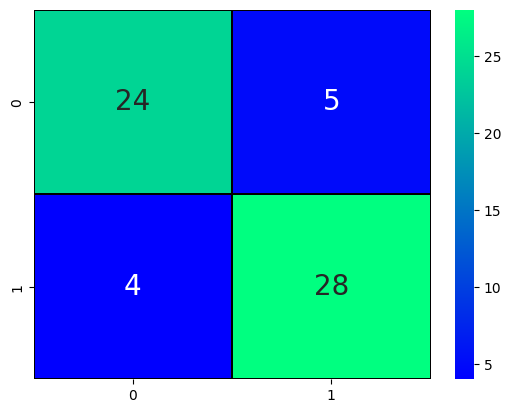

In [40]:
# Create a Naive Bayes model
nb = GaussianNB()

# Convert the target variable to integer type
y_train = y_train.astype('int')

# Train the Naive Bayes model
nb.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_nb = nb.predict(x_test)



# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy*100)
print("\nHence, the score for Naive Bayes is ", accuracy*100,"\n")

# **SVM**

              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61

Accuracy: 70.49180327868852

Hence, the score for SVM is  70.49180327868852 



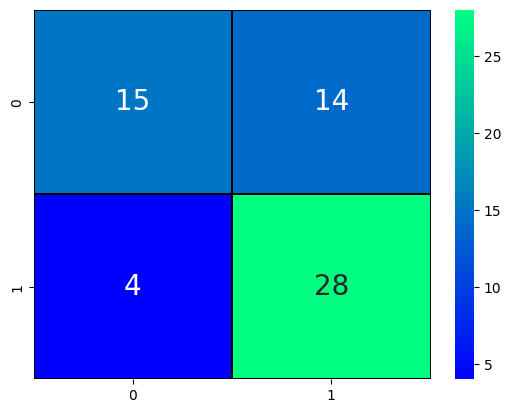

In [41]:
# Create an SVM classifier with default parameters
svm = SVC()

# Fit the classifier to the training data
svm.fit(x_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(x_test)

# Create a confusion matrix
confusion_mat = metrics.confusion_matrix(y_test, y_pred)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
cm= metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(classification_report(y_test, y_pred))
print("Accuracy:", (accuracy*100))
print("\nHence, the score for SVM is ", (accuracy*100),"\n")

# **COMPARISON STUDY**

In [42]:
model ={"Logistic Regression":LogisticRegression(max_iter=1000,solver='lbfgs'), "KNN":KNeighborsClassifier(),"Random forest":RandomForestClassifier(),"Decision Tree":DecisionTreeClassifier(), "SVM":SVC(), "Adaboost":AdaBoostClassifier(),"Naive Bayes":GaussianNB(), }
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

model_scores = fit_and_score(models=model,x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918,
 'Decision Tree': 0.8524590163934426,
 'SVM': 0.7049180327868853,
 'Adaboost': 0.8032786885245902,
 'Naive Bayes': 0.8688524590163934}

In [43]:
mode_compare = pd.DataFrame(model_scores,index=["Accuracy"])
mode_compare

,Logistic Regression,KNN,Random forest,Decision Tree,SVM,Adaboost,Naive Bayes
Accuracy,0.885246,0.688525,0.836066,0.852459,0.704918,0.803279,0.868852


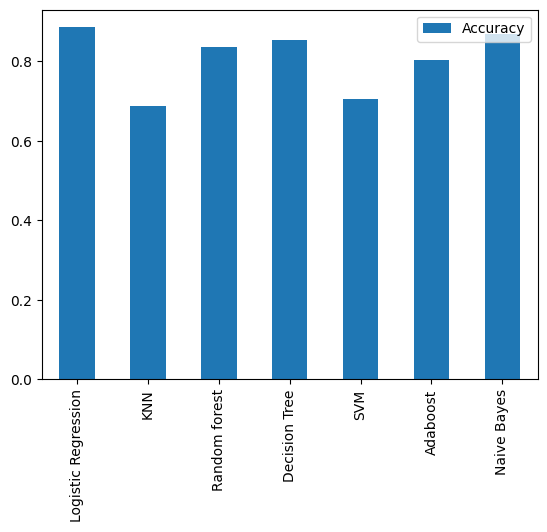

In [44]:
mode_compare.T.plot.bar();
plt.xticks(rotation=90);